Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats
from ydata_profiling import ProfileReport
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Preparing the Data
    - Check for missing, null, NaN values
    - Check for outliers
    - Transform data

In [2]:
# read csv file
df = pd.read_csv(r'C:\Users\krist\Downloads\telco-customer-churn.csv')

In [3]:
# inspect data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check for duplicate rows
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Checking for missing, null, NaN values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is an unexpected object datatype for TotalCharges, so I will convert it to numerical values later on.

In [6]:
# check for missing in numerical columns
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check in object columns
(df == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the TotalCharges column, so I will begin inspection regarding that.

In [8]:
# convert strings to numerical values, changing errors to NaN values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
# check which entries are 0
print((df == 0).sum())

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


As I found out later the tenure values of 0 correlate to those who had no total charges. SeniorCitizen values of 0 also make sense since that column is already in numeric binary form.

In [10]:
# check which rows have NaN values
print(df[df['TotalCharges'].isna()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [11]:
# check which rows have tenure = 0
print(df[df['tenure'] == 0])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

Since all the rows that have a missing value in the TotalCharges column had a tenure of 0 months, I checked if those same rows were the only ones with a tenure of 0 months, which they were. Therefore, I feel fairly confident that the reason they had no total charge was because they only recently joined the company and haven't yet accrued any charges.

Checking for outliers

In [12]:
# select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [13]:
# calculate z-scores
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

In [14]:
# determine outliers based on threshold of 3, -3
outliers = (z_scores.abs() > 3).any(axis=1)

In [15]:
print(df[outliers])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


According to this, there are no outliers within the tenure, MonthlyCharges, and TotalCharges columns.

Transforming the Data

In [16]:
# select the categorical columns
object_columns = df.select_dtypes(include=['object'])

In [17]:
# check how many unique values there are for each column
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

In [18]:
# convert all values into numerical (code block from cs675 project this semester)
# preserve categories for reverse mapping for visualizations 
df_categorical_dictionaries = {}
# create a dictionary where keys are the number of unique rows and the values are the values from each column
for col in object_columns:
    # create keys from sorted unique values
    keys = sorted(df[col].unique().tolist())
    # label the keys from 1 to len(keys)
    values = [i for i in range(1, len(keys) + 1)]
    # create a mapping dictionary for converting column
    map_dict = {k: v for k, v in list(zip(keys, values))}
    # reverse the key-value pairs for the reverse-mapping to recover original labels (for visualization later)
    df_categorical_dictionaries[col] = {v: k for k, v in map_dict.items()}
    # make these columns' datatype: category
    df[col] = df[col].apply(lambda x: map_dict[x]).astype('category')

In [19]:
df_categorical_dictionaries

{'customerID': {1: '0002-ORFBO',
  2: '0003-MKNFE',
  3: '0004-TLHLJ',
  4: '0011-IGKFF',
  5: '0013-EXCHZ',
  6: '0013-MHZWF',
  7: '0013-SMEOE',
  8: '0014-BMAQU',
  9: '0015-UOCOJ',
  10: '0016-QLJIS',
  11: '0017-DINOC',
  12: '0017-IUDMW',
  13: '0018-NYROU',
  14: '0019-EFAEP',
  15: '0019-GFNTW',
  16: '0020-INWCK',
  17: '0020-JDNXP',
  18: '0021-IKXGC',
  19: '0022-TCJCI',
  20: '0023-HGHWL',
  21: '0023-UYUPN',
  22: '0023-XUOPT',
  23: '0027-KWYKW',
  24: '0030-FNXPP',
  25: '0031-PVLZI',
  26: '0032-PGELS',
  27: '0036-IHMOT',
  28: '0040-HALCW',
  29: '0042-JVWOJ',
  30: '0042-RLHYP',
  31: '0048-LUMLS',
  32: '0048-PIHNL',
  33: '0052-DCKON',
  34: '0052-YNYOT',
  35: '0056-EPFBG',
  36: '0057-QBUQH',
  37: '0058-EVZWM',
  38: '0060-FUALY',
  39: '0064-SUDOG',
  40: '0064-YIJGF',
  41: '0067-DKWBL',
  42: '0068-FIGTF',
  43: '0071-NDAFP',
  44: '0074-HDKDG',
  45: '0076-LVEPS',
  46: '0078-XZMHT',
  47: '0080-EMYVY',
  48: '0080-OROZO',
  49: '0082-LDZUE',
  50: '0082-OQI

In [20]:
# manually make SeniorCitizen column category
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [21]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5376,1,0,2,1,1,1,2,1,1,...,1,1,1,1,1,2,3,29.85,29.85,1
1,3963,2,0,1,1,34,2,1,1,3,...,3,1,1,1,2,1,4,56.95,1889.50,1
2,2565,2,0,1,1,2,2,1,1,3,...,1,1,1,1,1,2,4,53.85,108.15,2
3,5536,2,0,1,1,45,1,2,1,3,...,3,3,1,1,2,1,1,42.30,1840.75,1
4,6512,1,0,1,1,2,2,1,2,1,...,1,1,1,1,1,2,3,70.70,151.65,2
5,6552,1,0,1,1,8,2,3,2,1,...,3,1,3,3,1,2,3,99.65,820.50,2
6,1003,2,0,1,2,22,2,3,2,1,...,1,1,3,1,1,2,2,89.10,1949.40,1
7,4771,1,0,1,1,10,1,2,1,3,...,1,1,1,1,1,1,4,29.75,301.90,1
8,5605,1,0,2,1,28,2,3,2,1,...,3,3,3,3,1,2,3,104.80,3046.05,2
9,4535,2,0,1,2,62,2,1,1,3,...,1,1,1,1,2,1,1,56.15,3487.95,1


The customerID column got sorted by the numbers portion (in ascending order), so those new labels are not in ascending order. However, I don't think this is a problem since those IDs are simply identifiers and these new labels are also unique to each customer.

List the Types of Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

Now, MonthlyCharges, TotalCharges, and tenure are numerical and the rest of the columns are categorical.

EDA Section
Numerical Columns Analysis

In [23]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


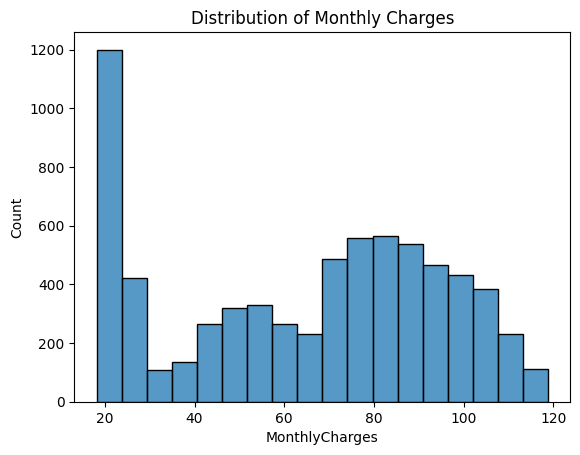

In [24]:
sns.histplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges')
plt.show()

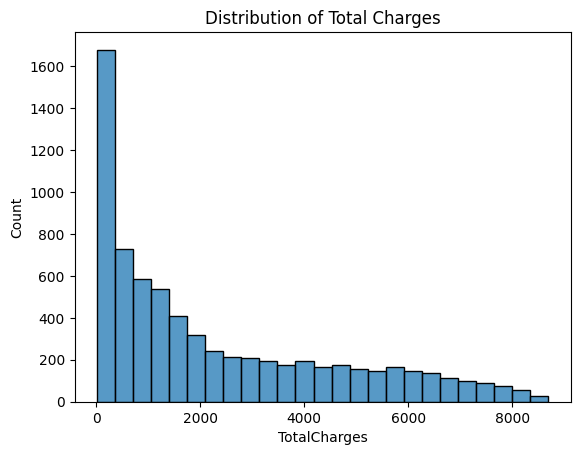

In [25]:
sns.histplot(df['TotalCharges'])
plt.title('Distribution of Total Charges')
plt.show()

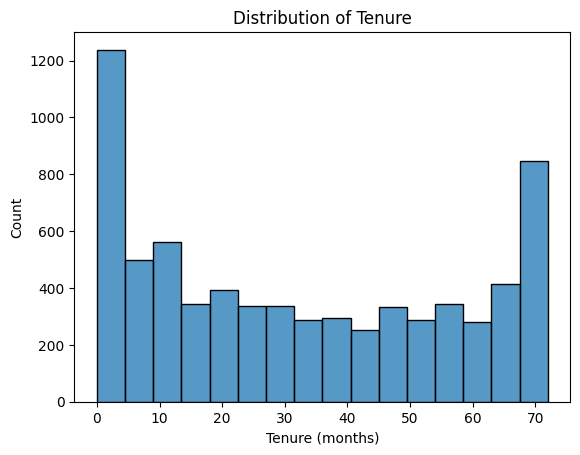

In [26]:
sns.histplot(df['tenure'])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.show()

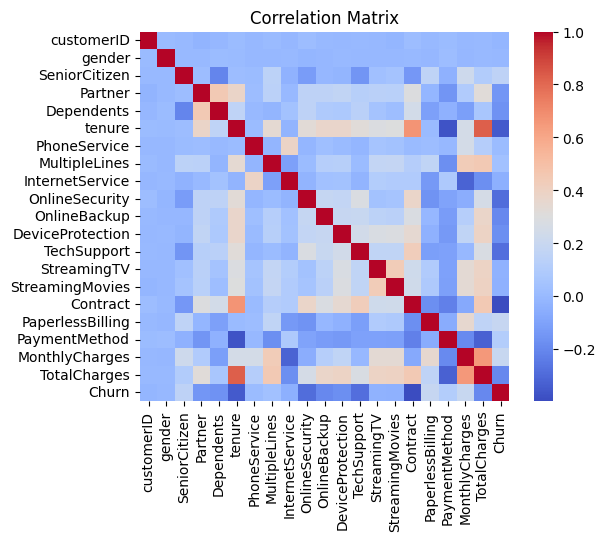

In [27]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [28]:
# use the reverse mapping dictionary to convert the numerical values back to original labels
for col in df_categorical_dictionaries:
    reverse_map = df_categorical_dictionaries[col]
    df[col] = df[col].map(reverse_map)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Contract and tenure

In [30]:
# average tenure by Contract length
average_tenure_by_contract = df.groupby('Contract', observed=False)['tenure'].mean()
print(average_tenure_by_contract)

Contract
Month-to-month    18.036645
One year          42.044807
Two year          56.735103
Name: tenure, dtype: float64


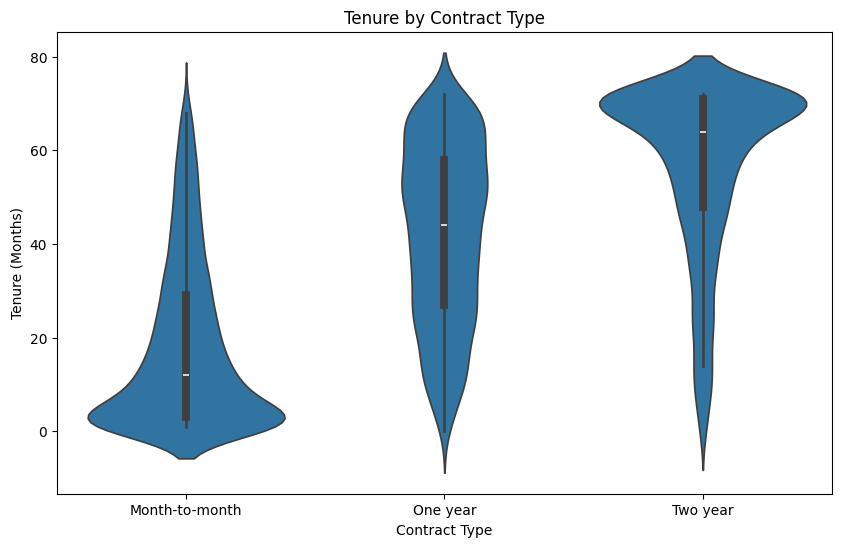

In [31]:
# visualization
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='tenure', data=df)
plt.title('Tenure by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.show()

Contract and tenure have a pretty strong positive correlation (in the matrix) which makes sense since the longer you are with a company, the more likely you are to have a longer contract (two year vs. month-to-month). As we can see from the average tenures and the violin plot, the average tenure for a month-to-month contract customer is nearly 40 years less than that of a two year contract customer, supporting the strong positive correlation shown in the matrix.

PaymentMethod and tenure

In [32]:
# average tenure by PaymentMethod
average_tenure_by_payment = df.groupby('PaymentMethod', observed=False)['tenure'].mean()
print(average_tenure_by_payment)

PaymentMethod
Bank transfer (automatic)    43.656736
Credit card (automatic)      43.269382
Electronic check             25.174630
Mailed check                 21.830025
Name: tenure, dtype: float64


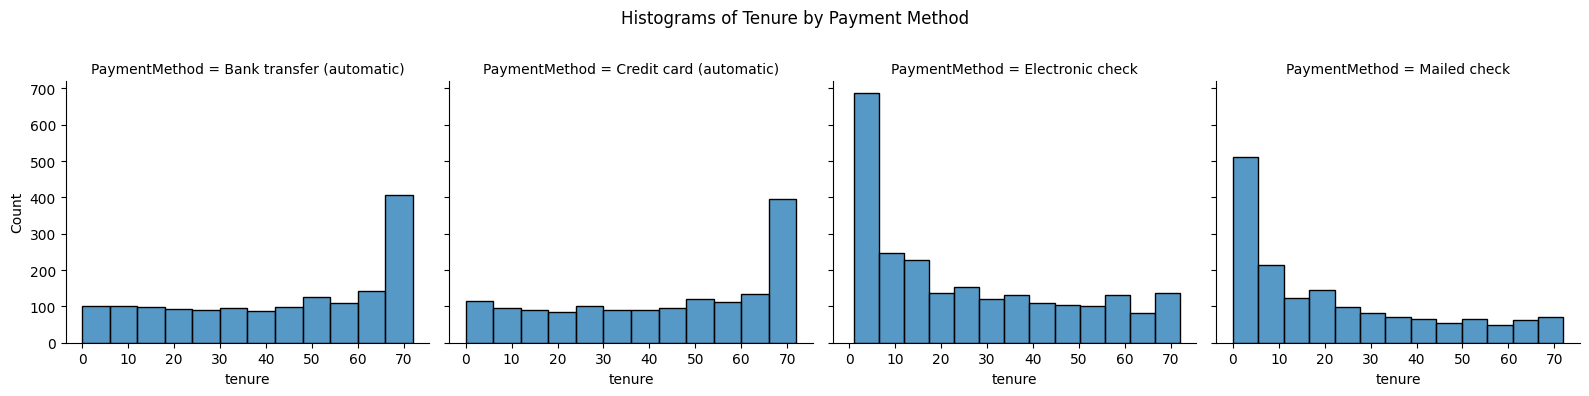

In [33]:
# visualization
grids = sns.FacetGrid(df, col='PaymentMethod', col_wrap=4, height=4)
grids.map(sns.histplot, 'tenure')
plt.subplots_adjust(top=0.8)
grids.fig.suptitle('Histograms of Tenure by Payment Method')
plt.show()

The various histograms show the differences in counts of tenure among the different payment methods. The two automatic methods of payment have a higher average tenure compared to the two non-automatic options. Once again, this makes sense to me since those who have been with the company longer are more likely to enroll in automatic payments since it gets tedious to pay manually every time, especially if you know that you are going to stick around. 

In [34]:
# separate tenure by payment method
check_payment_methods = df['PaymentMethod'].unique()
tenure_groups = [df[df['PaymentMethod'] == method]['tenure'] for method in check_payment_methods]

# perform ANOVA
f_statistic, p_value = stats.f_oneway(*tenure_groups)
print(f'F-statistic: {f_statistic}, P-value: {p_value}')

F-statistic: 446.46688624797173, P-value: 1.503848361277172e-265


The stats only confirm this correlation as the high F-statistic tells us there is a substantial difference in the average tenures among the different payment methods and the low P-value tells us to reject the null hypothesis and assume the evidence is statistically significant. 

Referring back to the correlation matrix, the variables that seem to have a stronger negative correlation to Churn are tenure and Contract, followed closely by OnlineSecurity and TechSupport. 

Tenure and Churn

In [35]:
# average tenure by churn
tenure_churn_analysis = df.groupby('Churn', observed=False)['tenure'].mean()
print(tenure_churn_analysis) 

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


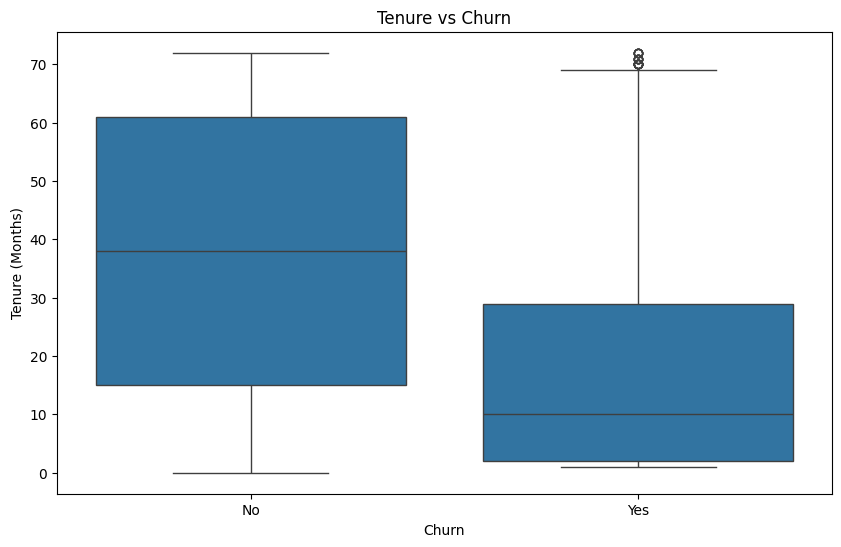

In [36]:
# visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

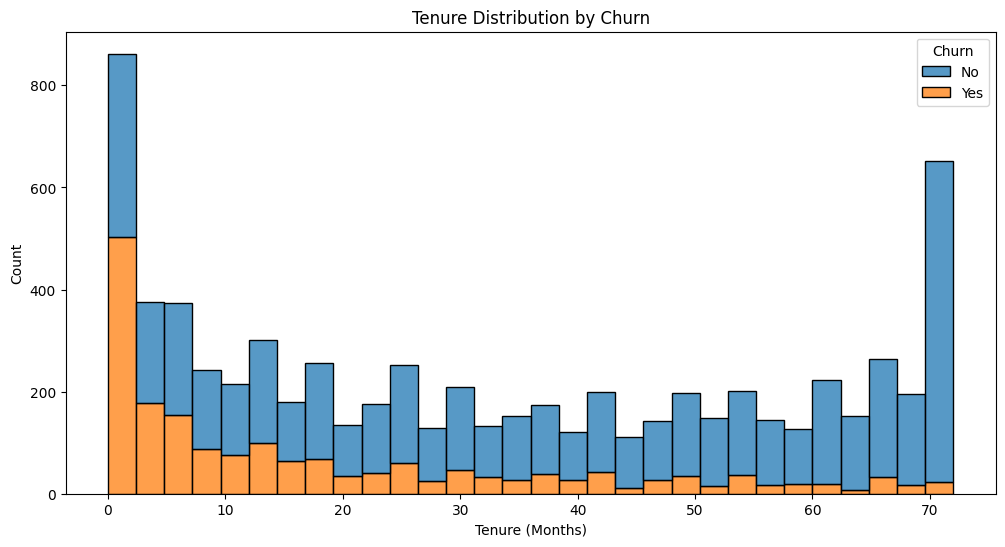

In [37]:
# another visualization 
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

In [38]:
# calculate churn rate percentage for different tenures
def customers_below(n):
    customers_below_n = df[df['tenure'] < n].shape[0]
    return customers_below_n
    
def customers_below_and_churned(n):
    customers_below_n_and_churned = df[(df['tenure'] < n) & (df['Churn'] == 'Yes')].shape[0]
    return customers_below_n_and_churned

print(f'Percent Churned Under 2 Months: {customers_below_and_churned(2)/customers_below(2)*100}')
print(f'Percent Churned Under 5 Months: {customers_below_and_churned(5)/customers_below(5)*100}')
print(f'Percent Churned Under 10 Months: {customers_below_and_churned(10)/customers_below(10)*100}')
print(f'Percent Churned Under 36 Months: {customers_below_and_churned(36)/customers_below(36)*100}')

Percent Churned Under 2 Months: 60.89743589743589
Percent Churned Under 5 Months: 54.92730210016155
Percent Churned Under 10 Months: 49.78425026968716
Percent Churned Under 36 Months: 37.600200400801604


The average tenure to churn is about 18 months versus the average tenure to not churn is more than double that. The box plot tells us that most of the "churners" lie between the tenures of 0 to 30 months while the "non-churners" lie between 15 to 60 months. Along with the histogram and percentages, it seems like the lower tenure a customer has, the more likely they are to churn, meaning the early stages of a customer's experience with the company are the most crucial. First impressions are important!

In [39]:
# use statistical tests to confirm correlation
churned_tenure = df[df['Churn'] == 'No']['tenure']
not_churned_tenure = df[df['Churn'] == 'Yes']['tenure']
t_stat, p_value = stats.ttest_ind(churned_tenure, not_churned_tenure)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 31.57955051135377, P-value: 7.99905796059022e-205


Since, the T-statistic is relatively large, this confirms that the difference in the average tenure between churned and non-churned is quite important. The low P-value also confirms this since we are meant to reject the null hypothesis and conclude that there is a statistically significant difference in tenure here.

Contract and Churn

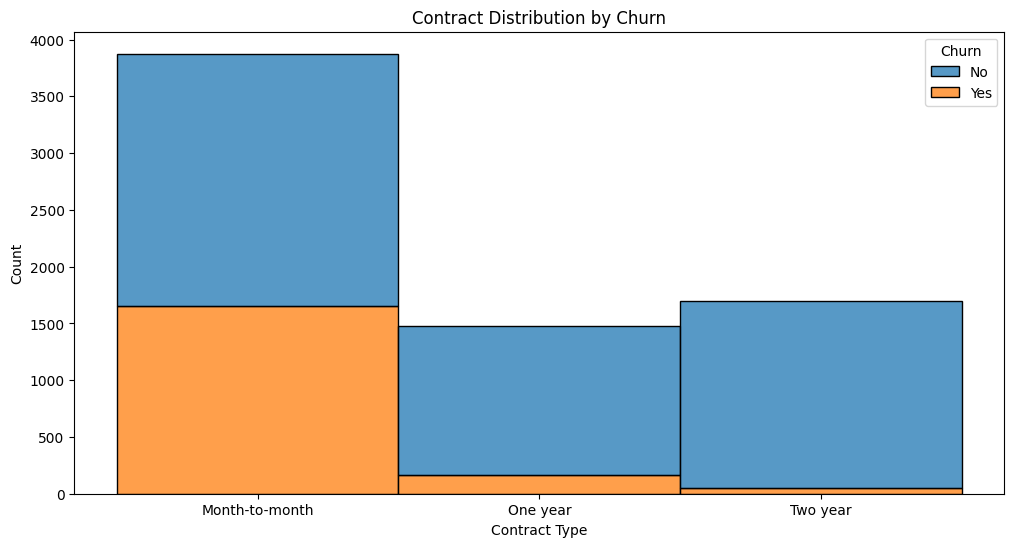

In [40]:
# visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Contract', hue='Churn', multiple="stack", bins=30)
plt.title('Contract Distribution by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [41]:
#calculate churn rate percentage for different Contract types
def customers_contract(type):
    customer_contract_count = df[df['Contract'] == type].shape[0]
    return customer_contract_count

def customers_contract_and_churned(type):
    customer_contract_and_churned_count = df[(df['Contract'] == type) & (df['Churn'] == 'Yes')].shape[0]
    return customer_contract_and_churned_count
    
print(f'Percent Month-to-month churned: {customers_contract_and_churned('Month-to-month')/
customers_contract('Month-to-month')*100}')
print(f'Percent One year churned: {customers_contract_and_churned('One year')/
customers_contract('One year')*100}')
print(f'Percent Two year churned: {customers_contract_and_churned('Two year')/
customers_contract('Two year')*100}')

Percent Month-to-month churned: 42.70967741935484
Percent One year churned: 11.269517990495586
Percent Two year churned: 2.831858407079646


Here, we can see a similar story in that the churn rate decreases significantly as the contracts get longer. Those who have month-to-month contracts are much more likely to churn which makes sense since it is harder to leave when you are contractually obligated to stay. The histogram strongly supports this argument and helps visualize it significantly. Thus, the company should urge customers to sign up for longer contracts if they want a lower churn rate.

OnlineSecurity and Churn

In [42]:
# calculate percentage of churn rate among different options for OnlineSecurity
def customers_online(type):
    customer_online_count = df[df['OnlineSecurity'] == type].shape[0]
    return customer_online_count

def customers_online_and_churned(type):
    customer_online_and_churned_count = df[(df['OnlineSecurity'] == type) & (df['Churn'] == 'Yes')].shape[0]
    return customer_online_and_churned_count
    
print(f'Percent no security churned: {customers_online_and_churned('No')/
customers_online('No')*100}')
print(f'Percent no internet service churned: {customers_online_and_churned('No internet service')/
customers_online('No internet service')*100}')
print(f'Percent security churned: {customers_online_and_churned('Yes')/
customers_online('Yes')*100}')

Percent no security churned: 41.76672384219554
Percent no internet service churned: 7.404980340760157
Percent security churned: 14.611193660227837


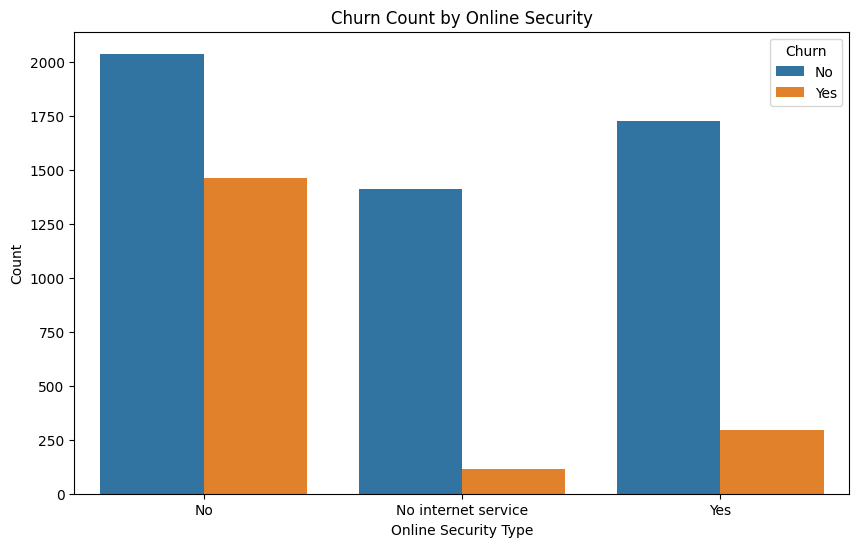

In [43]:
# visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Count by Online Security')
plt.xlabel('Online Security Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

As we can see from both the percentages and bar graph, there is a pretty significant difference among churn rates between the various options for OnlineSecurity. The most significant difference is the one for No online security as this has the highest churn rate among the three. This makes sense because without online security, customers are more likely to have issues and therefore, are more likely to leave the company. This gives the company great feedback and should encourage them to push their customers to sign up for online security.

TechSupport and Churn

In [44]:
# calculate percentage of churn rate among different options for TechSupport
def customers_support(type):
    customer_support_count = df[df['TechSupport'] == type].shape[0]
    return customer_support_count

def customers_support_and_churned(type):
    customer_support_and_churned_count = df[(df['TechSupport'] == type) & (df['Churn'] == 'Yes')].shape[0]
    return customer_support_and_churned_count
    
print(f'Percent no support churned: {customers_support_and_churned('No')/
customers_support('No')*100}')
print(f'Percent no internet service churned: {customers_support_and_churned('No internet service')/
customers_support('No internet service')*100}')
print(f'Percent support churned: {customers_support_and_churned('Yes')/
customers_support('Yes')*100}')

Percent no support churned: 41.63547365390153
Percent no internet service churned: 7.404980340760157
Percent support churned: 15.166340508806261


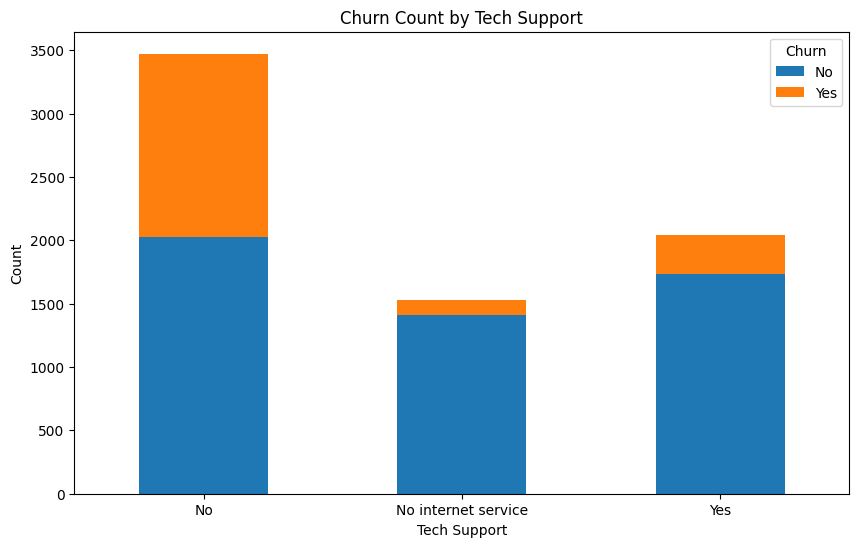

In [45]:
churn_count = df.groupby(['TechSupport', 'Churn'], observed=False).size().unstack(fill_value=0)
churn_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Count by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

These percentages and bar graph show very similar results to the previous comparison between OnlineSecurity and Churn which again makes sense. If the customer hadn't gotten tech support they were much more likely to churn since they probably didn't receive the help they needed. This gives the company another important piece of information which can encourage them to prioritize their tech support and make sure their customers are getting support when they need it.

Based on my EDA, the most important variables I found that will affect Churn (the target variable) are tenure, Contract, OnlineSecurity, and TechSupport.

Generate Report

In [46]:
# convert all values back into numerical
# preserve categories for reverse mapping for visualizations 
df_categorical_dictionaries = {}
# create a dictionary where keys are the number of unique rows and the values are the values from each column
for col in object_columns:
    # create keys from sorted unique values
    keys = sorted(df[col].unique().tolist())
    # label the keys from 1 to len(keys)
    values = [i for i in range(1, len(keys) + 1)]
    # create a mapping dictionary for converting column
    map_dict = {k: v for k, v in list(zip(keys, values))}
    # reverse the key-value pairs for the reverse-mapping to recover original labels (for visualization later)
    df_categorical_dictionaries[col] = {v: k for k, v in map_dict.items()}
    # make these columns' datatype: category
    df[col] = df[col].apply(lambda x: map_dict[x]).astype('category')

In [47]:
df_categorical_dictionaries

{'customerID': {1: '0002-ORFBO',
  2: '0003-MKNFE',
  3: '0004-TLHLJ',
  4: '0011-IGKFF',
  5: '0013-EXCHZ',
  6: '0013-MHZWF',
  7: '0013-SMEOE',
  8: '0014-BMAQU',
  9: '0015-UOCOJ',
  10: '0016-QLJIS',
  11: '0017-DINOC',
  12: '0017-IUDMW',
  13: '0018-NYROU',
  14: '0019-EFAEP',
  15: '0019-GFNTW',
  16: '0020-INWCK',
  17: '0020-JDNXP',
  18: '0021-IKXGC',
  19: '0022-TCJCI',
  20: '0023-HGHWL',
  21: '0023-UYUPN',
  22: '0023-XUOPT',
  23: '0027-KWYKW',
  24: '0030-FNXPP',
  25: '0031-PVLZI',
  26: '0032-PGELS',
  27: '0036-IHMOT',
  28: '0040-HALCW',
  29: '0042-JVWOJ',
  30: '0042-RLHYP',
  31: '0048-LUMLS',
  32: '0048-PIHNL',
  33: '0052-DCKON',
  34: '0052-YNYOT',
  35: '0056-EPFBG',
  36: '0057-QBUQH',
  37: '0058-EVZWM',
  38: '0060-FUALY',
  39: '0064-SUDOG',
  40: '0064-YIJGF',
  41: '0067-DKWBL',
  42: '0068-FIGTF',
  43: '0071-NDAFP',
  44: '0074-HDKDG',
  45: '0076-LVEPS',
  46: '0078-XZMHT',
  47: '0080-EMYVY',
  48: '0080-OROZO',
  49: '0082-LDZUE',
  50: '0082-OQI

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5376,1,0,2,1,1,1,2,1,1,...,1,1,1,1,1,2,3,29.85,29.85,1
1,3963,2,0,1,1,34,2,1,1,3,...,3,1,1,1,2,1,4,56.95,1889.50,1
2,2565,2,0,1,1,2,2,1,1,3,...,1,1,1,1,1,2,4,53.85,108.15,2
3,5536,2,0,1,1,45,1,2,1,3,...,3,3,1,1,2,1,1,42.30,1840.75,1
4,6512,1,0,1,1,2,2,1,2,1,...,1,1,1,1,1,2,3,70.70,151.65,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [50]:
# convert all categorical columns to integer types
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int8   
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


Split Dataset into Training and Test Datasets and Compare on Target Variable 'Churn'

In [52]:
# split data and use random state to preserve reproducibility 
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [53]:
# generate SweetViz report to compare the training and test datasets on target 'Churn'
test_train_churn_report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], target_feat='Churn')

                                             |                                             | [  0%]   00:00 ->…

In [54]:
# create html file to store and show report
test_train_churn_report.show_html("sweetviz_churn_compare_report.html")

Report sweetviz_churn_compare_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
# create pandas profiling report for data and save to html file
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 5 3 ... 4 8 3]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 9 ... 0 9 9]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype i

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

I didn't find too many limitations or issues with this particular dataset. There were only 11 missing values that I found out of over 7000, so that didn't impact my EDA too much. One thing that I noticed was that only 1869 customers in this dataset churned compared to 5174 that hadn't. Although this isn't surprising persay, I do feel it could theoretically bias any future models built on this data. Other than that, no other limitations or issues based on this specific data really came to mind.

Split the Data

In [56]:
# separate data
X = df.drop(columns=['Churn'])
y = df['Churn']

In [57]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Algorithm Selection for Before SMOTE Technique

The machine learning models I will be using on the original dataset are the Naive Bayes model, Logistic Regression, Random Forests, and XGBoost in that order. I think this selection will give me a good range of models to learn about and practice on allowing me to assess for myself which models works better for which types of data.

Naive Bayes Model
Model Building

In [58]:
# check for Nan values
print(X.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64


In [59]:
# replace those with 0
X.fillna(0, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [60]:
# check
print(pd.isnull(X).sum())  
print(pd.isnull(X_train).sum())  
print(pd.isnull(X_test).sum()) 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Depend

In [61]:
# initialize model
gnb = GaussianNB()

In [62]:
# train model
gnb.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred = gnb.predict(X_test)

Model Evaluation

In [64]:
print(confusion_matrix(y_test, y_pred))

[[782 254]
 [ 84 289]]


Based on the confusion matrix, the true negatives are relatively high and the true positives are low meaning that the not churned class was more correctly predicted than the churned class. The false positives number is relatively which is good and the false negatives number is very low which is great. This means that not too many of the instances were falsely predicted.

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



These scores have a lot of spread between them which is interesting to me. The precision for the not churned class is much higher than that of the churned class with the scores being 90% and 53% respectively. This indicates an issue to me in that very little of the churned class is being correctly predicted which is problematic for a model that is meant to predict when a customer might churn. Both of the recall scores were pretty close in percent and relatively high indicating that most of the instances for both not churned and churned were correctly predicted. Lastly, the f1 score for the not churned class is much higher than the churned class, 82% vs. 63% respectively, indicating that the precision-recall balance is much better for the first class. Overall accuracy is 76% for the entire dataset which is not bad. 

Model Tuning

In [66]:
# define hyperparamter grid
parameter_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [67]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=gnb, param_grid=parameter_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2) 

In [68]:
# fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05]},
             scoring='recall', verbose=2)

In [69]:
# find best parameters
best_params = grid_search.best_params_
print(best_params)

{'var_smoothing': 1e-08}


In [70]:
# run best model
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

In [71]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



After tuning the model with the "scoring" parameter set to recall (I looked for the one that gave me overall the most improved results), I was able to get the best improvement on the model. This really only shows in the recall for the churned class with a 1% increase which is still better than nothing. Most of the other parameters remained the same aside from the macro average for the f1 score decreasing by 1%. I expect that these scores will improve overall much more after I modify my dataset using the SMOTE technique later on.

Logistic Regression
Model Building

In [72]:
# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# initialize logistic regression model
log_reg = LogisticRegression()

In [74]:
# fit model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
y_pred = log_reg.predict(X_test_scaled)

In [76]:
print(confusion_matrix(y_test, y_pred))

[[935 101]
 [160 213]]


The confusion matrix shows that the true negatives increased from the Naive Bayes model while the true positives decreased which indicates that this model is better at predicting the not churned instances, but worse at predicting the churned instances. Both false negatives and positives are relatively low, so this model is decent at not predicting the wrong instances.

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



These scores are pretty mixed, similar to the Naive Bayes model which is interesting. The precision for the not churned class is still better than the churned class, 85% vs. 68% respectively, indicating the same thing as before (that the model is better at predicting not churned instances than churned instances. The recall for the not churned class is significantly better for the not churned class than the churned class, 90% vs. 57% respectively, which means that the model correctly predicted more of the not churned instances than the churned instances. Overall accuracy is 81% which is better than the Naive Bayes model's accuracy both before and after tuning. Lastly, f1 scores are similar to the previous model with the numbers being better for the not churned class than the churned class.

Model Tuning

In [78]:
# define hyperparameters
parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [79]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=log_reg, param_grid=parameter_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

In [80]:
# fit model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall', verbose=2)

In [81]:
# find best hyperparameters
print(grid_search.best_params_)

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [82]:
# run best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

In [83]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1036
           1       0.62      0.65      0.63       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



I would say that the scores for the different features are still fairly mixed, but the most important ones improved. The recall for the not churned class went down 4% while for the churned class went up 8%. This is significant since now 65% of the churned instances were correctly predicted, improving the overall functionality for the model. The precision for the not churned class went up while for the churned class went down which is not ideal, but is a gamble I took for the sake of balancing out the recall more. Because of this the f1 scores for both classes also balanced out more which is good. Unfortunately, overall accuracy went down 1% which is not too bad, but definitely not ideal. 

Random Forests
Model Building

In [84]:
# initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [85]:
# fit model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred = rf_model.predict(X_test)

Model Evaluation

In [87]:
print(confusion_matrix(y_test, y_pred))

[[941  95]
 [187 186]]


Once again, the true negatives heavily outweigh the true positives which is still concerning. In general, the false positives and negatives are pretty low which is good, so I will look to improve the true values when tuning the model.

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



For all the models so far, there is a similar pattern in the scores of the different features. The precision for the not churned class is again much higher than that of the churned class indicating that the model is better at correctly predicting the instances of not churned over churned. The recall is once again much higher than that of the churned class, nearly double from 91% to 50% respectively, showing us that the 91% of the not churned instances were correctly predicted vs. only 50% of the churned instances being correctly predicted (not good). Overall accuracy is pretty decent at 80% and both f1 scores make sense considering the not churned class is doing better than the churned class in general.

Model Tuning

In [89]:
# define hyperparameters
parameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [90]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=5, scoring='precision', n_jobs=-1, verbose=2)

In [91]:
# fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=2)

In [92]:
# get best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 200}


In [93]:
# run best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [94]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Here, I see a pretty consistent improvement across most scores which is nice to see. Precision for both class went up 1% and the recall for the churned class went up 2%. This is important since now 52% of the churned instances are being correctly predicted as oppose to the previous 50% (small wins are still good). The f1 score for the churned class reflect this improvement as it went up 2% as well. Lastly, accuracy for the dataset went up 1% as well which shows a decent improvement across the entire model.

XGBoost
Model Building

In [95]:
# initialize model
xgb_model = XGBClassifier(eval_metric='logloss')

In [96]:
# fit model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [97]:
y_pred = xgb_model.predict(X_test)

Model Evaluation

In [98]:
print(confusion_matrix(y_test, y_pred))

[[905 131]
 [169 204]]


There are similar results to the previous models with the true negatives outweighing the true positives. Both the false positives and negatives are relatively low which is a good sign. 

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



Overall, I would say that the scores here are a bit more balanced than those in the previous models, but not by much. Again, the not churned precious is much better than the churned precision (84% vs. 61% respectively), indicating that the model is better at predicting the not churned instances vs. churned instances. Similarly, the recall for the not churned class is much better than that of the churned class which means that 87% of the not churned class for properly predicted as opposed to only 55% for the churned class. Overall accuracy is 79% which is decent and the f1 scores reflect the precision-recall balances well with the not churned being 86% and the churned only 58%

Model Tuning

In [100]:
# define hyperparameters
parameter_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [3, 5, 7, 9],        
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0],      
    'colsample_bytree': [0.6, 0.8, 1.0] 
}

In [101]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameter_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

In [102]:
# fit new model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [103]:
# get best hyperparameters
print(grid_search.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [104]:
# run best model
best_xgb_model = grid_search.best_estimator_

In [105]:
y_pred = best_xgb_model.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



By this point I felt a bit more comfortable with the hyperparameters given for each model, so I experimented with using a few different ones to tune this model. I saw the most improvement with this model which makes sense since I gave more hyperparameters for tuning. The precision for both classes increased with the one for the churned class increasing significantly by 8% which is much better. The recall for both classes for both classes also improved although it would have been nice to see a little bit of a higher increase for the churned class. Both f1 scores also increased, reflecting the improvement for precision-recall balance in both classes. Lastly, accuracy increased by 3% from 79% to 82% which is great to see. When tuning the following models (using the modified dataset), I will stick to the same hyperparameters for the sake of consistency, but in the future I would love to explore using more for different models to try to get the most accurate model I can.

Address Data Imbalance Using SMOTE Technique

In [107]:
# check for Nan values
print(X.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [108]:
# separate data
X = df.drop(columns=['Churn'])
y = df['Churn']

In [109]:
# replace Nan values with 0
X.fillna(0, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [110]:
# create instance and resample
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [111]:
# split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [112]:
# check new distribution
print(y_resampled.value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


Algorithm Selection for After SMOTE Technique

The machine learning models I will be using on the modified dataset are the Naive Bayes model, Logistic Regression, Random Forests, and XGBoost in that order, same as before.

Naive-Bayes
Model Building

In [113]:
# initialize model
gnb = GaussianNB()

In [114]:
# train model
gnb.fit(X_resampled, y_resampled)

GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)

Model Evaluation

In [116]:
print(confusion_matrix(y_test, y_pred))

[[783 238]
 [180 869]]


Right from the confusion matrix, I can see that the true negatives and true positives outweigh the false positives and negatives which is a good sign. The model was better at predicting churned customers than not churned customers which is something to keep in mind when model tuning. Similarly, the model was worse at predicting customers who were predicted to churn, but didn't, another thing to keep in mind for later. I would say that overall this confusion matrix indicates the the SMOTE technique helped in balancing the data and the model.

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



An accuracy of 80% is pretty good and indicates a well performing model. The precision for the negative and positive class are fairly similar, 81% not churned and 79% churned. Recall was a bit more dividing in that 77% of the not churned instances were correctly predicted and 83% of the churned instances were correctly predicted which matches what the confusion matrix showed. The F-1 scores for both classes were very similar, indicating a good balance between precision and recall for both. This report looks much better than the same model on the original dataset which again shows me that the modified dataset had a great impact on the model.

Model Tuning

In [118]:
# define hyperparamter grid
parameter_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [119]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=gnb, param_grid=parameter_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2) 

In [120]:
# fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05]},
             scoring='f1', verbose=2)

In [121]:
# find best parameters
best_params = grid_search.best_params_
print(best_params)

{'var_smoothing': 1e-08}


In [122]:
# run best model
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

In [123]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1021
           1       0.78      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.80      0.79      2070



Tuning the hyperparameters of this model definitely made the numbers a little less balanced overall, but generally improved. The recall, precision, and f1 scores were further apart now, but recall improved for the churned class. This means the model is better at identifying positive instances whereas for the not churned class there was a mix in performance. Precision was better, but recall and f1 scores decreased, so it might miss more actual postives instances in general.

Logistic Regression
Model Building

In [124]:
# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# initialize logistic regression model
log_reg = LogisticRegression()

In [126]:
# fit model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [127]:
y_pred = log_reg.predict(X_test_scaled)

Model Evaluation

In [128]:
print(confusion_matrix(y_test, y_pred))

[[790 231]
 [135 914]]


Right off the bat, the true negatives and positives were higher than those of the Naive Bayes model and the false positives and negatives were lower than those of the Naive Bayes model. This tells me that this model already works better for my data without any hyperparameter tuning which is notable.

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1021
           1       0.80      0.87      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



Again, most of these scores are higher than those in the Naive Bayes model, indicating that this model already fits the data better. 82% accuracy is pretty good as well as the 85% precision for the not churned class and 80% precision for the churned class. The lowest score in the entire report is the recall score for the not churned class at 77%, but even still that is a good starting point. This tells me that 77% of the not churned instances were correctly predicted while 87% of the churned instances were predicted correctly. This is a pretty big difference which I am looking to correct with the tuning of the model. Lastly, the f1 scores for both classes were above 80% so there is a good precision-recall balance in both classes.

Model Tuning

In [130]:
# define hyperparameters
parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [131]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=log_reg, param_grid=parameter_grid, cv=5, scoring='precision', n_jobs=-1, verbose=2)

In [132]:
# fit model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='precision', verbose=2)

In [133]:
# find best hyperparameters
print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [134]:
# run best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

In [135]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1021
           1       0.80      0.87      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



For this model, the hyperparameter tuning only improved the scores which was nice to see. The recall and f1 score for the not churned class each went up by 1% percent which means that the model now correctly predicted 78% of not churned instances and there is a better balance between recall and precision. Other than that, the accuracy, macro and weighted averages all went up which is a good indicator that tuning the model worked fairly well.

Random Forests
Model Building

In [136]:
# initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [137]:
# fit model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [138]:
y_pred = rf_model.predict(X_test)

Model Evaluation

In [139]:
print(confusion_matrix(y_test, y_pred))

[[875 146]
 [140 909]]


This model seems to be doing better immediately with more correct predictions and less false predictions. The only one that is worse is false negatives at 140 which is only a few more than the previous model, so overall the model is running fairly well.

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



All of these scores are already quite impressive to me with most being at 86% and the highest being 87% for the recall for the churned class. There were very high precision scores indicating 86% of the instances predicted in both classes were correct. The high recall scores of 86% and 87% indicate that the models correctly predict those percentages of instances in both classes (fewer false negatives). The high f1 scorres show a good precision-recall balance and the high accuracy shows that 86% of all predictions made by the model were correct.

Model Tuning

In [141]:
# define hyperparameters
parameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [142]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=5, scoring='precision', n_jobs=-1, verbose=2)

In [143]:
# fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=2)

In [144]:
# get best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


In [145]:
# run best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [146]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1021
           1       0.86      0.87      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



Most of the scores increased this time around, so tuning the model definitely helped. Almost every score increased by 1% making the model more accurate, more precise, more sensitive and better balanced. In the future when I have more time, I would love to try playing around with different hyperparameters, particularly for this model since it seems like there are a lot to explore, and learn more about which ones have what effects on different score. 

XGBoost
Model Building

In [147]:
# initialize model
xgb_model = XGBClassifier(eval_metric='logloss')

In [148]:
# fit model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [149]:
y_pred = xgb_model.predict(X_test)

Model Evaluation

In [150]:
print(confusion_matrix(y_test, y_pred))

[[881 140]
 [158 891]]


Like all the models before, the true negatives and positives look much better than those from the models based on the original dataset. The false positives and negatives also look relatively low which is good to see. 

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



This report looks similar to the one from the Random Forests model which is good since it is fairly balanced and high. Most scores are an 86% which is a very good average for scores. Both precisions are high indicating that most instances are correctly predicted, and both recalls are also high indicating that 86% of not churned instances were correctly predicted and 85% of churned instances were correctly predicted. Both f1 scores reflect the precision-recall balance well and an 86% accuracy score is great. 

Model Tuning

In [152]:
# define hyperparameters
parameter_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [3, 5, 7, 9],        
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0],      
    'colsample_bytree': [0.6, 0.8, 1.0] 
}

In [153]:
# set up gridsearchcv
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameter_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

In [154]:
# fit new model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [155]:
# get best hyperparameters
print(grid_search.best_params_)

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}


In [156]:
# run best model
best_xgb_model = grid_search.best_estimator_

In [157]:
y_pred = best_xgb_model.predict(X_test)

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



After tuning the model, there was very little improvement since the report was already pretty good. I tried putting in different scores for the "scoring" parameter, but I was getting very similar results. Most of the scores are still very high and indicate a strong model. 

Overall, this project was a great opportunity for me to see how different models fit on the same dataset. I was also able to note the differences between the original dataset models and the modified model which was quite a big difference. I think my prediction from the first project regarding the number of churned vs. not churned customers in the original dataset skewing the data was definitely correct since all the first models were definitely more skewed towards the not churned data. I had never worked with hyperparameters regarding tuning the models before, so it was exciting to see the improvements in real time. I'm looking forward to learning how to apply even more models in the future as well as learning more about the different hyperparameters one can tune to improve a model.